In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
from sklearn.datasets import load_wine
import mlgrad.pca as pca
from sklearn.preprocessing import robust_scale, scale

In [4]:
X0, Y = load_wine(return_X_y=True)
X0 = robust_scale(X0)

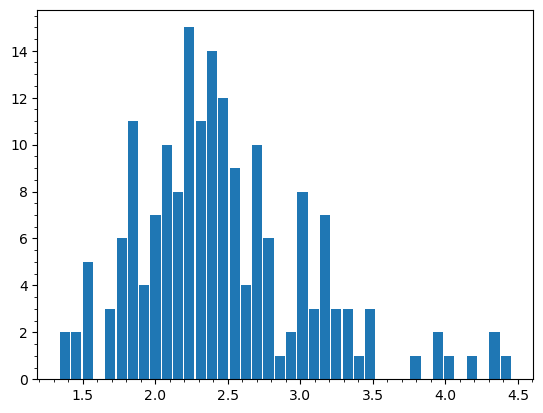

[-0.03755287  0.31847859  0.01875354 -0.00117586  0.09166174 -0.05663134
 -0.06331158  0.13047124  0.05128411  0.12352009 -0.02237203 -0.13656358
  0.15148247]


In [5]:
c0 = pca.location(X0)
# plt.plot(sorted(pca.distance_center(X0, c0)), marker='o', markersize=3)
plt.hist(pca.distance_center(X0, c0), bins=40, rwidth=0.9)
plt.minorticks_on()
plt.show()
print(c0)

0.7752808988764045
[ 0.06227721  0.31908422  0.07766755 -0.03739582  0.04575076 -0.04673688
 -0.06474113  0.13392722 -0.03238612  0.16227256 -0.0185589  -0.14377296
  0.16822419]


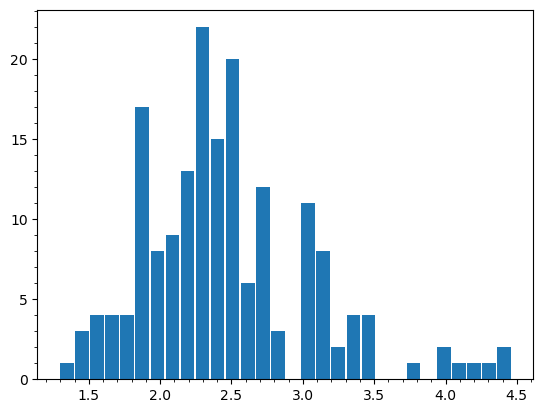

In [6]:
N = len(X0)
alpha = (N - 40) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.1))
c = pca.robust_location(X0, wma)
print(c)
# plt.plot(sorted(pca.distance_center(X0, c)), marker='o', markersize=4)
plt.hist(pca.distance_center(X0, c), bins=30, rwidth=0.9)
plt.minorticks_on()
plt.show()

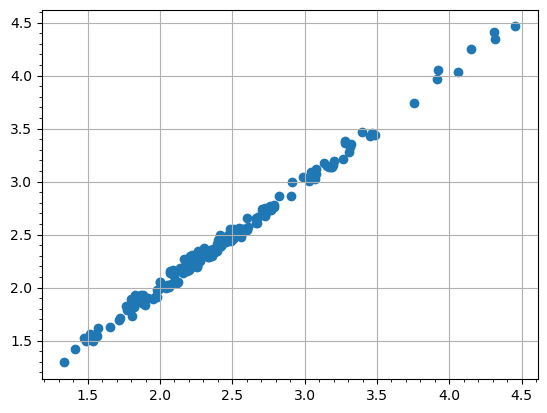

In [7]:
D0 = pca.distance_center(X0, c0)
D1 = pca.distance_center(X0, c)
plt.scatter(D0, D1)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [8]:
X1_0 = X0 - c0
X1 = X0 - c

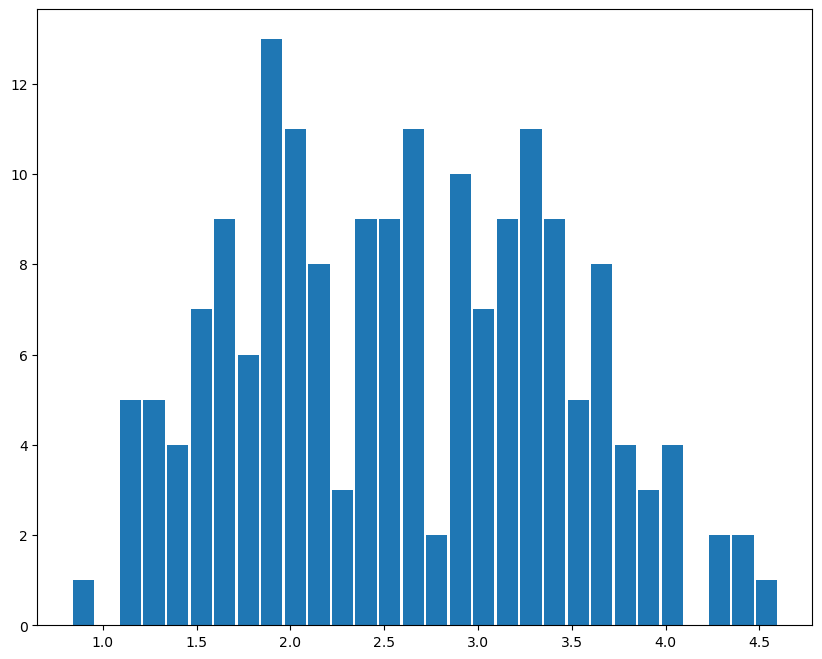

2.119920909224809 [ 0.11597898 -0.2939928  -0.04317871 -0.29921734  0.1628856   0.33026675
  0.36305914 -0.34304487  0.39124686 -0.11478206  0.30153938  0.31010373
  0.26510902]


In [9]:
a1_0, L1_0 = pca.find_pc(X1_0)
plt.figure(figsize=(10,8))
# plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.hist(pca.distance_center(X1_0, a1_0), bins=30, rwidth=0.9)
plt.show()
print(L1_0, a1_0)

0.8876404494382022
2.081783508287715 [ 0.12021926 -0.33793111 -0.08527533 -0.3289109   0.07628782  0.32914533
  0.36631103 -0.32221638  0.35991275 -0.10990459  0.33185242  0.30182198
  0.24676556]


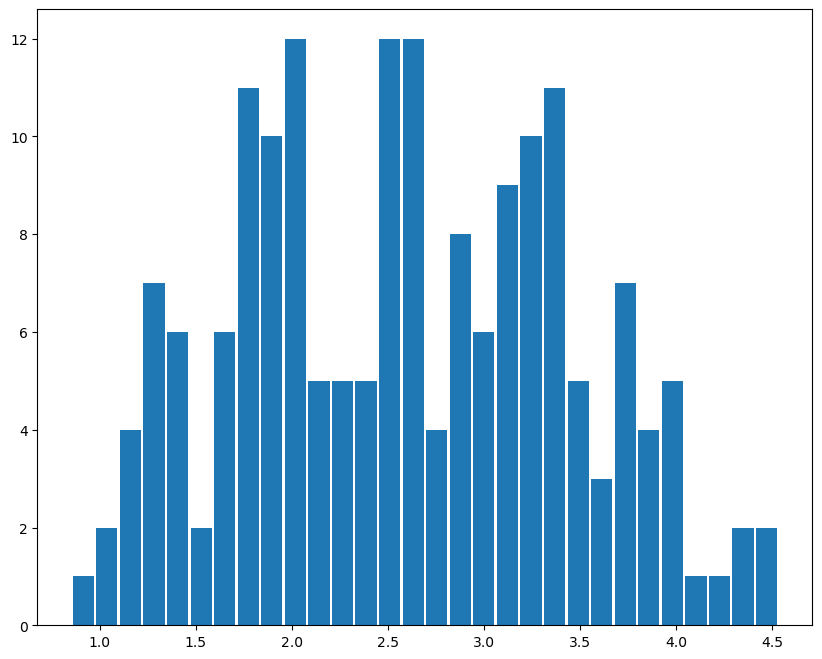

In [10]:
N = len(X0)
alpha = (N - 20) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.1))
a1, L1 = pca.find_robust_pc(X1, wma)
print(L1, a1)
plt.figure(figsize=(10,8))
# plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.hist(pca.distance_center(X1, a1), bins=30, rwidth=0.9)
plt.show()
U1 = pca.project_line(X0, a1)
U1_0 = pca.project_line(X0, a1_0)

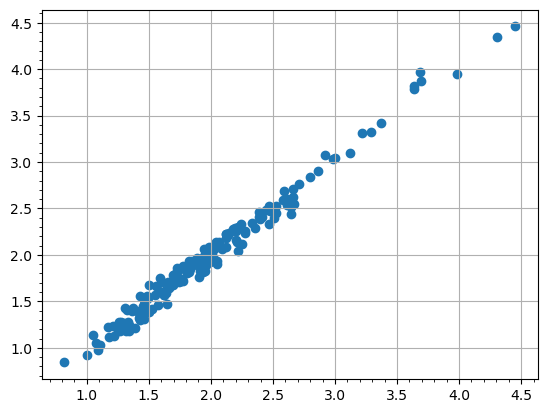

In [11]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [12]:
X2_0 = pca.project(X1_0, a1_0)
X2 = pca.project(X1, a1)

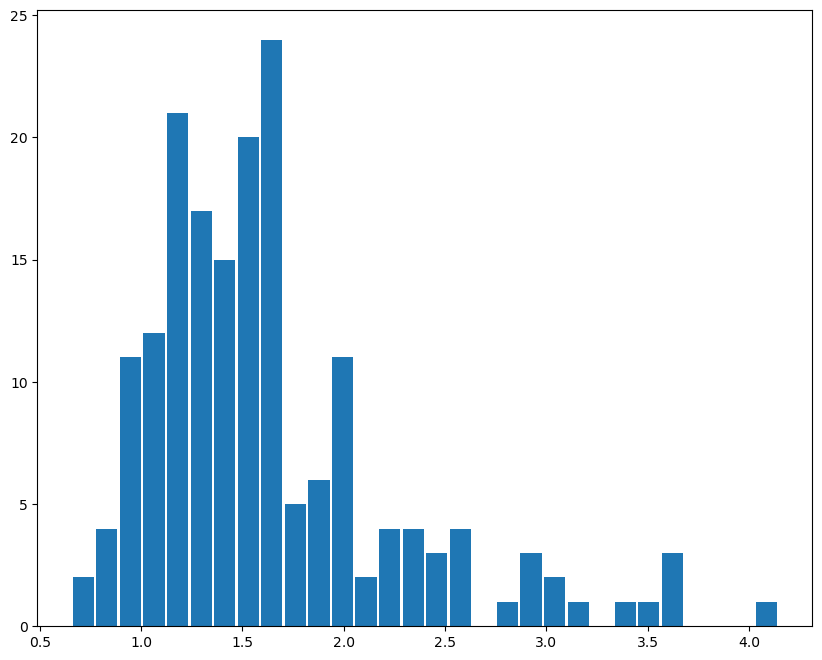

1.2699900180624297 [ 0.38193886  0.22403966  0.42644212  0.04831713  0.35406833  0.08717107
  0.03589011  0.01986948  0.10299292  0.55356794 -0.23482927 -0.09543408
  0.32217693]


In [13]:
a2_0, L2_0 = pca.find_pc(X2_0)
plt.figure(figsize=(10,8))
# plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.hist(pca.distance_line(X2_0, a2_0), bins=30, rwidth=0.9)
plt.show()
print(L2_0, a2_0)

0.8876404494382022


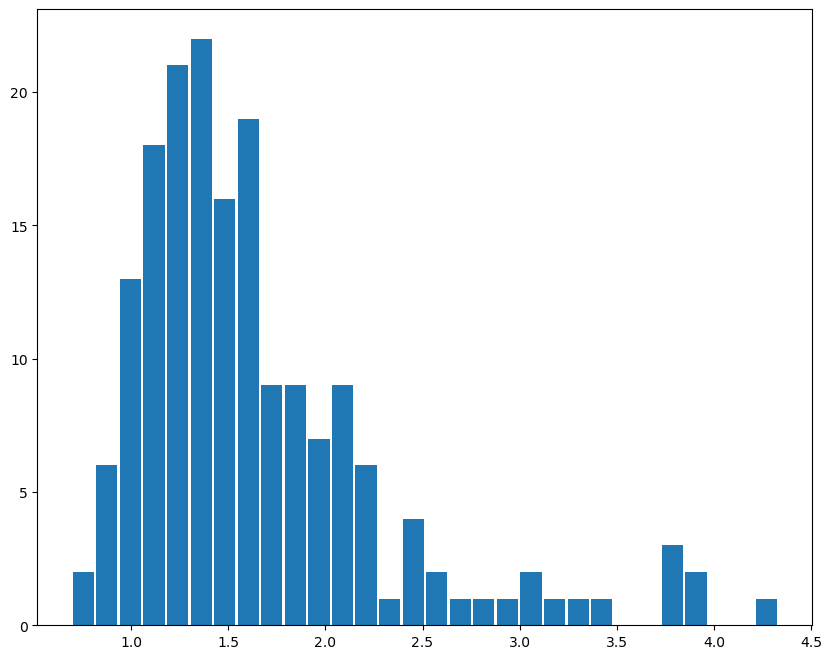

1.1832492160640666 [ 0.41247619  0.20044264  0.3183162  -0.09729086  0.41612239  0.06686524
  0.02572868 -0.08962268  0.0177866   0.52771992 -0.25230846 -0.11506622
  0.3699567 ]


In [14]:
N = len(X0)
alpha = (N - 20) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.1))
a2, L2 = pca.find_robust_pc(X2, wma)
plt.figure(figsize=(10,8))
# plt.plot(sorted(pca.distance_line(X2, a2)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.hist(pca.distance_line(X2, a2), bins=30, rwidth=0.9)
plt.show()
print(L2, a2)
U2 = pca.project_line(X0, a2)
U2_0 = pca.project_line(X0, a2_0)

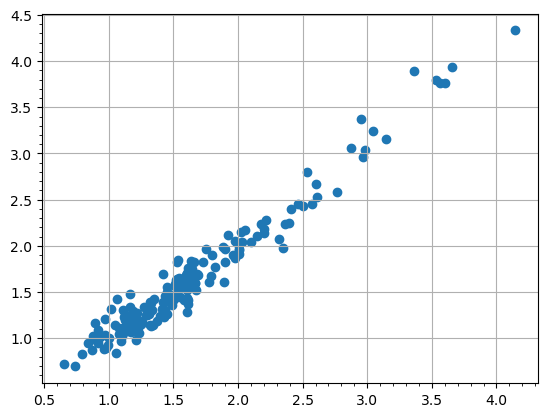

In [15]:
plt.scatter(pca.distance_line(X2_0, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [16]:
X3_0 = pca.project(X2_0, a2_0)
X3 = pca.project(X2, a2)

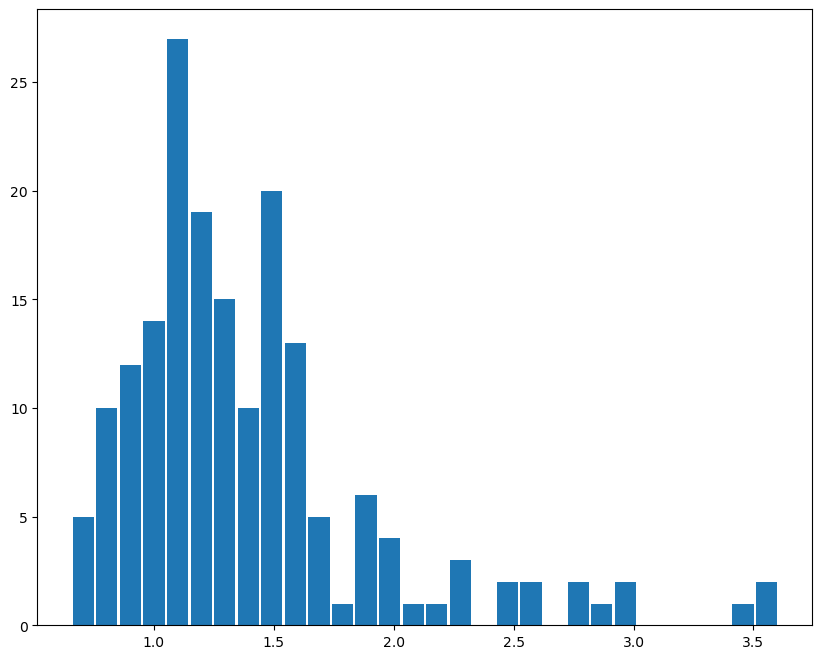

0.8184868101244229 [-0.2281699  -0.01665861  0.58535562  0.60267486  0.08968432  0.11294544
  0.13824955  0.12935366  0.17453845 -0.27807726  0.17724815  0.16641985
 -0.13510897]


In [17]:
a3_0, L3_0 = pca.find_pc(X3_0)
plt.figure(figsize=(10,8))
# plt.plot(sorted(pca.distance_line(X3_0, a3_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.hist(pca.distance_line(X3_0, a3_0), bins=30, rwidth=0.9)
plt.show()
print(L3_0, a3_0)

0.8595505617977528


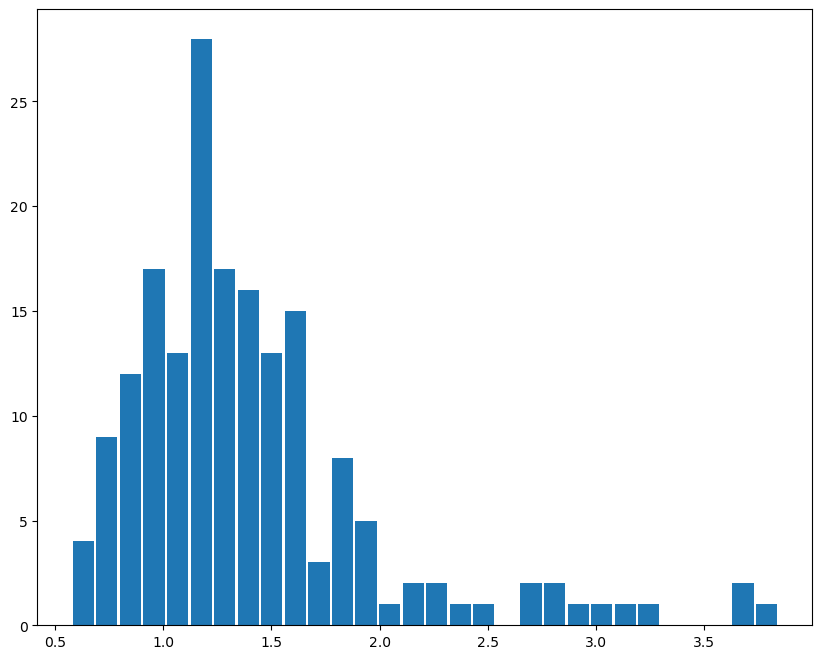

1.1832492160640666 [ 0.41247619  0.20044264  0.3183162  -0.09729086  0.41612239  0.06686524
  0.02572868 -0.08962268  0.0177866   0.52771992 -0.25230846 -0.11506622
  0.3699567 ]


In [18]:
N = len(X0)
alpha = (N - 25) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.1))
a3, L3 = pca.find_robust_pc(X3, wma)
plt.figure(figsize=(10,8))
# plt.plot(sorted(pca.distance_line(X3, a3)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.hist(pca.distance_line(X3, a3), bins=30, rwidth=0.9)
plt.show()
print(L2, a2)
U3 = pca.project_line(X0, a3)
U3_0 = pca.project_line(X0, a3_0)

In [19]:
X4_0 = pca.project(X3_0, a3_0)
X4 = pca.project(X3, a3)

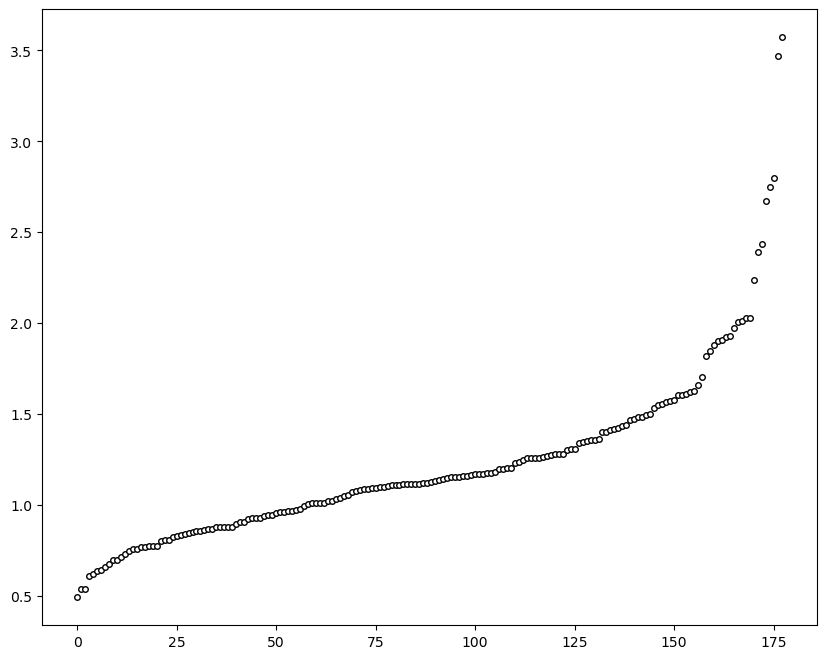

0.50257098356785 [ 0.07223146 -0.52214344  0.24236604 -0.12541124  0.26108304 -0.11898439
 -0.0971642   0.16413158 -0.59672424 -0.05065492  0.33729052 -0.10194741
  0.21488127]


In [20]:
a4_0, L4_0 = pca.find_pc(X4_0)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X4_0, a4_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L4_0, a4_0)

0.8876404494382022


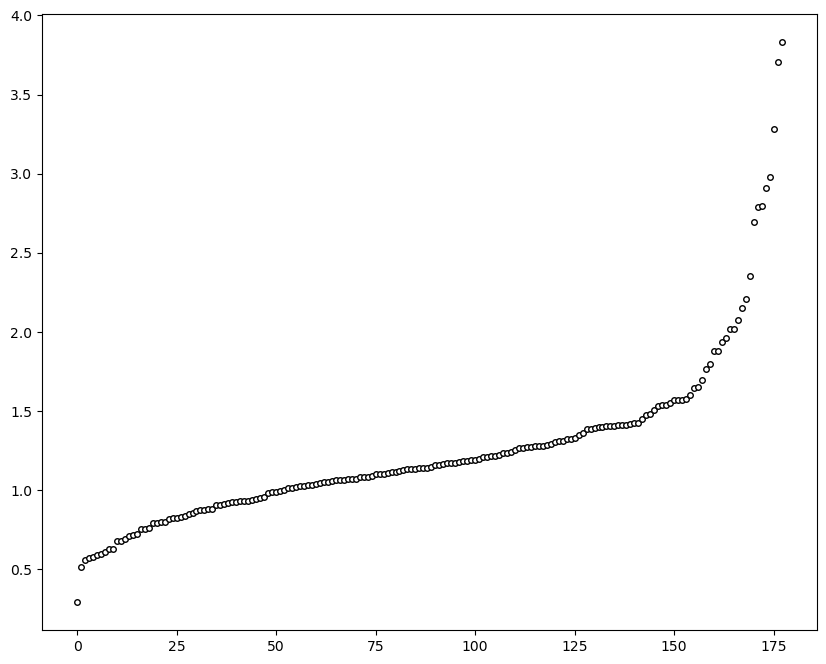

0.5916449325530682 [-0.03328074 -0.54563843  0.00687287 -0.22761368  0.32391508  0.02806949
  0.00589505  0.44939331 -0.43275497  0.1143819   0.29141381 -0.23708067
 -0.01133908]


In [21]:
N = len(X0)
alpha = (N - 20) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
a4, L4 = pca.find_robust_pc(X4, wma)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X4, a4)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L4, a4)
U4 = pca.project_line(X0, a4)
U4_0 = pca.project_line(X0, a4_0)

In [22]:
X5_0 = pca.project(X4_0, a4_0)
X5 = pca.project(X4, a4)

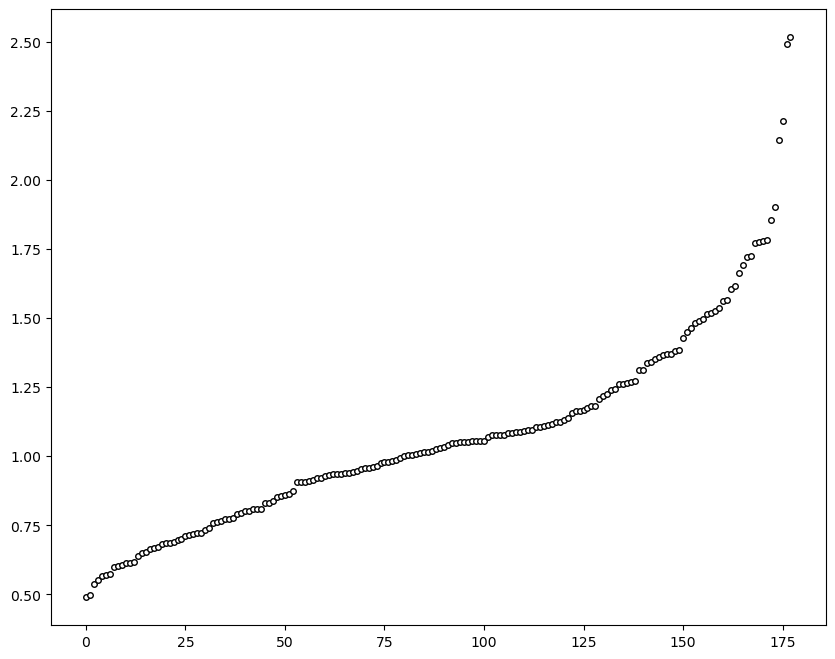

0.4496338931048647 [ 0.21772166 -0.08122437  0.1589523  -0.08805004 -0.74955667  0.17652174
  0.14575399  0.46688266  0.02429261  0.16616964  0.13103638  0.09483334
  0.16246876]


In [23]:
a5_0, L5_0 = pca.find_pc(X5_0)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X5_0, a5_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L5_0, a5_0)

0.7752808988764045


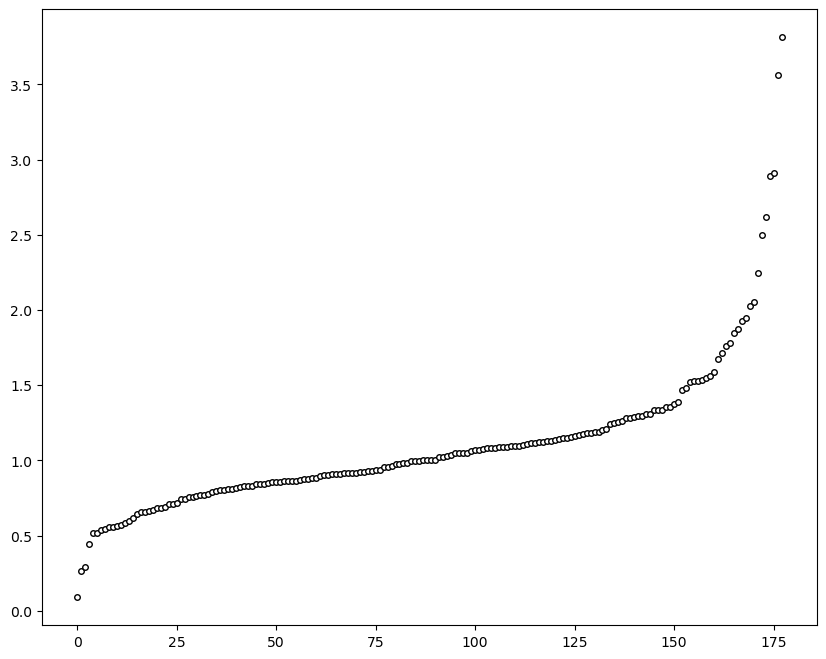

1.8801327630492441 [ 0.05164829  0.39332489 -0.00825522 -0.14702316  0.36160943 -0.17443117
  0.06442427 -0.25838637 -0.50602663 -0.51700357  0.17304474  0.09274944
  0.16413358]


In [24]:
N = len(X0)
alpha = (N - 40) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
a5, L5 = pca.find_robust_pc(X5, wma)
plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X5, a5)), marker='o', markersize=4, mfc='w', mec='k', c='w')
plt.show()
print(L5, a5)
U5 = pca.project_line(X0, a5)
U5_0 = pca.project_line(X0, a5_0)

In [25]:
from sklearn.decomposition import PCA

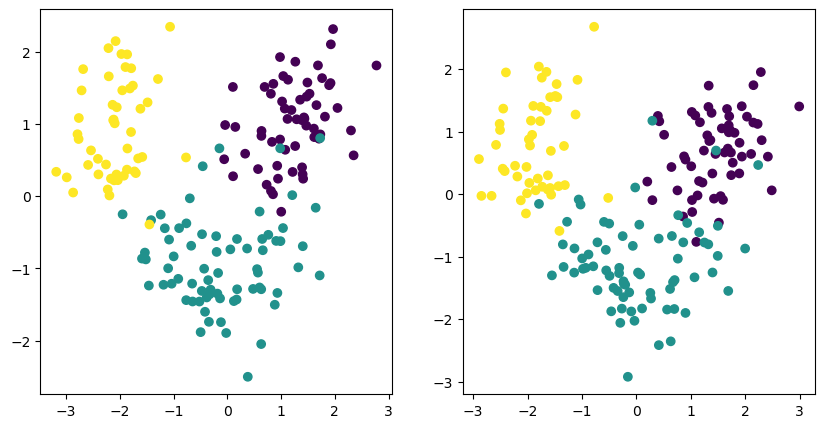

In [26]:
pca1 = PCA()
pca1.fit(X0)
U = pca1.transform(X0)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(U1, U2, c=Y)
plt.subplot(1,2,2)
plt.scatter(U[:,0], -U[:,1], c=Y)
plt.show()

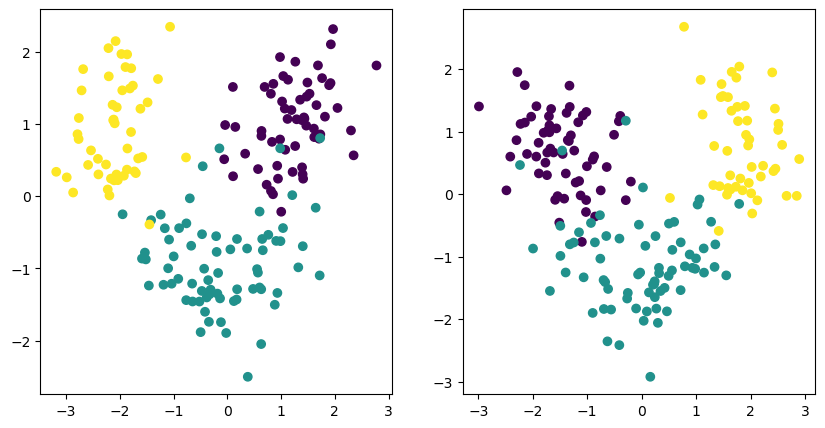

In [27]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(U1, U2, c=Y)
plt.subplot(1,2,2)
plt.scatter(-U[:,0], -U[:,1], c=Y)
plt.show()

In [28]:
As_0, Ls_0, Us_0 = pca.find_pc_all(X1_0)

In [29]:
N = len(X0)
alpha = (N - 30) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
As, Ls, Us = pca.find_robust_pc_all(X1, wma)

0.8314606741573034


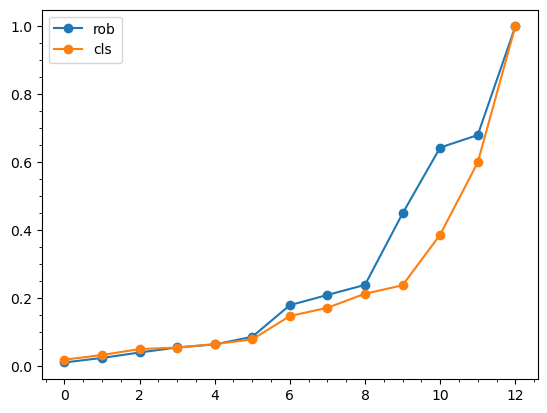

In [33]:
plt.plot(sorted(Ls/Ls.max()), marker='o', label='rob')
plt.plot(sorted(Ls_0/Ls_0.max()), marker='o', label='cls')
plt.legend()
plt.minorticks_on()
plt.show()

In [34]:
Vs = np.array([np.var(U) for U in Us])
Vs_0 = np.array([np.var(U) for U in Us_0])
Vs /= Vs.sum()
Vs_0 /= Vs_0.sum()

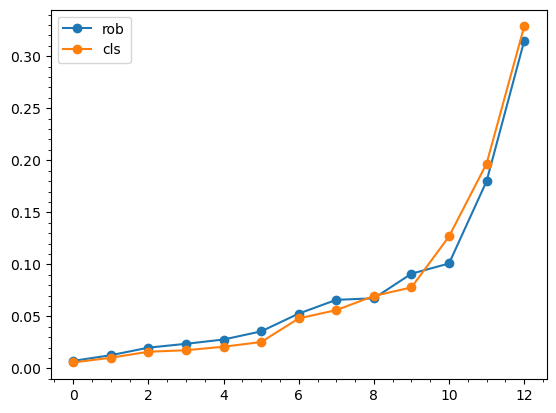

In [35]:
plt.plot(sorted(Vs), marker='o', label='rob')
plt.plot(sorted(Vs_0), marker='o', label='cls')
plt.legend()
plt.minorticks_on()
plt.show()

In [ ]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [ ]:
S = robust_scatter_matrix(X1, wma)
# print(S)

In [ ]:
L, A = np.linalg.eig(S)
# print(A)
print(L/L.sum())